## 클래스 합침

In [1]:
import pandas as pd
import numpy as np

In [2]:
wash_data = pd.read_csv('./wash.csv', header=None)
brush_data = pd.read_csv('./brush.csv', header=None)
walk_data = pd.read_csv('./walk.csv',header=None)
eat_data = pd.read_csv('./eat.csv', header=None)
sit_data = pd.read_csv('./sit.csv', header=None)
stand_data = pd.read_csv('./stand.csv', header=None)
dummy_data = pd.read_csv('./dummy.csv', header=None)

dummy_data[16] = 0
wash_data[16] = 1
brush_data[16] = 2
eat_data[16] = 3
walk_data[16] = 0
sit_data[16] = 0
stand_data[16] = 0

dummy_arr = dummy_data.to_numpy()
wash_arr = wash_data.to_numpy()
brush_arr = brush_data.to_numpy()
walk_arr = walk_data.to_numpy()
eat_arr = eat_data.to_numpy()
sit_arr = sit_data.to_numpy()
stand_arr = stand_data.to_numpy()

In [3]:
len(dummy_arr)

675

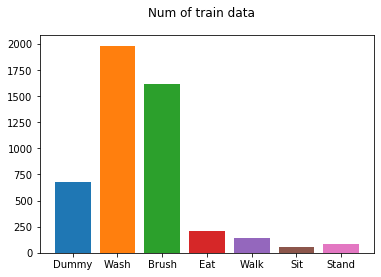

In [6]:
import matplotlib.pyplot as plt

plt.bar(0, len(dummy_arr))
plt.bar(1, len(wash_arr))
plt.bar(2, len(brush_arr))
plt.bar(3, len(eat_arr))
plt.bar(4, len(walk_arr))
plt.bar(5, len(sit_arr))
plt.bar(6, len(stand_arr))

plt.xticks((0, 1, 2, 3, 4, 5, 6), ('Dummy', 'Wash', 'Brush', 'Eat', 'Walk', 'Sit', 'Stand'))
plt.suptitle('Num of train data')
plt.show() 

In [4]:

tot_data = np.concatenate((dummy_arr, wash_arr[0:500], wash_arr[1000:1500], brush_arr[0:500], brush_arr[1000:1500], walk_arr, eat_arr, sit_arr, stand_arr))
train_x = tot_data[:,:-1]
train_y = tot_data[:,-1:]


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.01)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, train_x, train_y.flatten(), cv=skf)

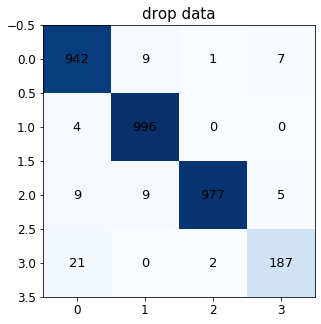

In [8]:
from sklearn.metrics import confusion_matrix

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_y.flatten(), y_train_pred)

# Plot confusion matrix
plt.title("drop data", fontsize=15)
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', fontsize=13)
#plt.xlabel(['dummy', 'wash', 'brush', 'eat', 'walk', 'stand', 'sit'])
# plt.xlabel("kmeans label")
# plt.ylabel("truth label")
plt.show()

In [7]:
from sklearn.svm import SVC
from micromlgen import port
svm_clf = SVC(random_state=42, gamma = 0.01).fit(train_x, train_y.flatten())
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[16], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 16);
    for (uint16_t i = 0; i < 16; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.01 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[420] = { 0 };
    double decisions[6] = { 0 };
    int votes[4] = { 0 };
        kernels[0] = compute_kernel(x,   10.24  , 7.89  , 4.33  , -2.43  , 2.0  , 2.24  , 3.1  , -3.58  , -5.56  , 5.45  , -0.8  , -0.8  , 0.88  , 1.66  , 0.17  , -1.23 );
        kernels[1] = compute_kernel(x,   10.41  , 7.54  , 3.99  , -2.44  , 2.31  , 3.46  , 4.15  , -1.29  , -1.74  , 7.23  , -0.16  , -0.12  , 0.76  , -1.32  , 0.46  , 1.0 );
        kernels[2] = compute_kernel(x,   10.06  , 9.37  , -0.52  , 3.31  , 1.07  , 0.69  , 1.34  , -0.08  , -0.04  , 0.02  , -0.1 